In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import tree
import warnings
warnings.filterwarnings("ignore", message="To output multiple subplots, the figure containing the passed axes is being cleared")
pd.set_option('mode.chained_assignment', None)

In [2]:
#Reading the given data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
#Displaying Train Dataset
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Displaying Test Dataset
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape[0] #No.of people in the training dataset 

891

In [6]:
test.shape[0] #No.of people for we have to predict the survival 

418

In [7]:
train.isnull().sum() 
#To find no. of cells having missing values in each column in the training dataset. Here Age and Cabin have so many null values.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum() 
#To find no. of cells having missing values in each column in the testing dataset. Here Age and Cabin have so many null values.

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

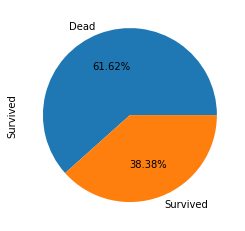

In [9]:
#To find how many people survived/dead in the training set
labels='Dead','Survived'
train.Survived.value_counts().plot(kind='pie',labels=labels,autopct='%1.2f%%')

In [10]:
#To plot piecharts of survived/dead people against a specific category.Red represents dead and green represents survived
def piechart(category,startangle=0):
    fig,ax=plt.subplots(figsize=(18,10))
    labels='Dead','Survived'
    colors=['red','green']
    dead=train[train['Survived']==0][category].value_counts() #Calculate no. of people dead against category
    survived=train[train['Survived']==1][category].value_counts() #Calculate no. of people survived against category
    sd=pd.DataFrame([dead,survived])
    sd.plot(kind='pie',ax=ax,labels=labels,colors=colors,autopct='%1.2f%%',subplots=True,startangle=startangle)

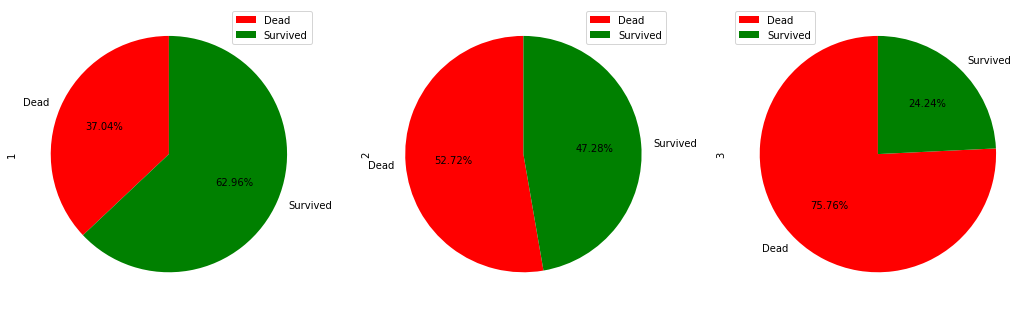

In [11]:
piechart('Pclass',90)
#The following pie chart shows that 1st class people were more likely to survive and 3rd class people were more likely to die

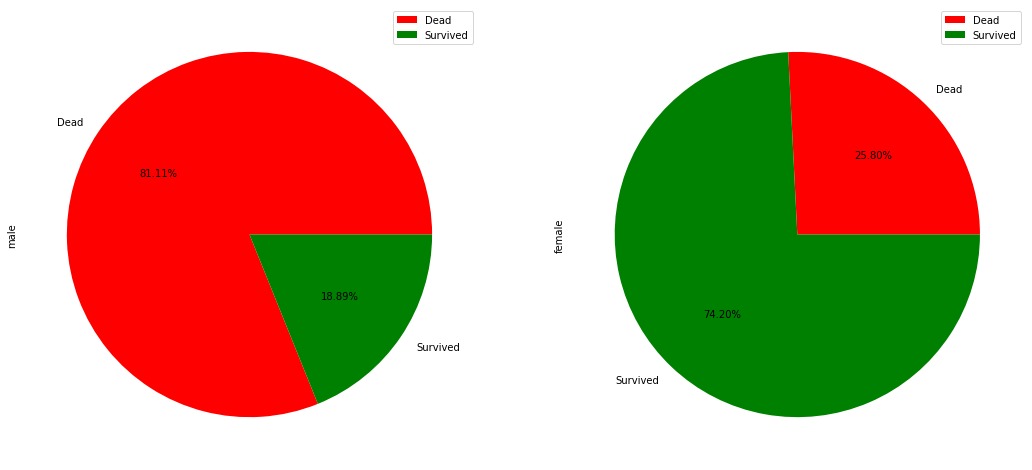

In [12]:
piechart('Sex')
#The following pie chart shows that women are likeley to survive more than men.

In [13]:
#Converting Sex to integer values
gender={"male":0,"female":1}
combo=[train,test]
for dataset in combo:
    dataset['Sex']=dataset['Sex'].map(gender)

In [14]:
#Filling missing Embarked values.
#Embarked can be filled easily with most common value='S'(infered from the train dataset) as only two values are missing.
train['Embarked'].fillna('S',inplace=True)
#Converting embarked to integer values
embarkment={"S":1,"C":2,"Q":3}
combo=[train,test]
for dataset in combo:
    dataset['Embarked']=dataset['Embarked'].map(embarkment)

In [15]:
#From the prefix of name of the person we can estimate the age of the person. For Example: Mr.Cook, is a married man
#So we extract the prefix from the name
combo=[train,test]
for dataset in combo:
    dataset['Prefix']=dataset['Name'].str.extract(pat='([A-Za-z]+\.)') 
arr1=train['Prefix'].unique()
arr2=test['Prefix'].unique()
prefix=np.concatenate((arr1,arr2),axis=0)
np.unique(prefix)

array(['Capt.', 'Col.', 'Countess.', 'Don.', 'Dona.', 'Dr.', 'Jonkheer.',
       'Lady.', 'Major.', 'Master.', 'Miss.', 'Mlle.', 'Mme.', 'Mr.',
       'Mrs.', 'Ms.', 'Rev.', 'Sir.'], dtype=object)

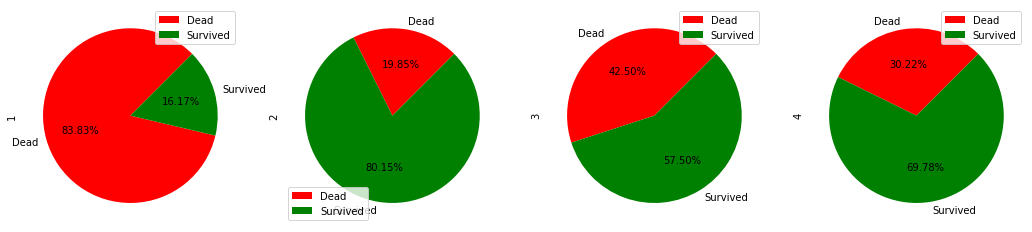

In [16]:
#Mapping values to prefix to estimate the age
prefix={"Mr.":1,"Mrs.":2,"Master.":3,"Miss.":4,"Don.":1,"Dona.":2,"Dr.":1,"Jonkheer.":1,"Lady.":2,
        "Major.":1,"Mlle.":2,"Ms.":2,"Mme.":2,"Capt.":1,"Col.":1,"Countess.":2,"Rev.":1,"Sir.":1}
for dataset in combo:
    dataset['Prefix']=dataset['Prefix'].map(prefix)
piechart('Prefix',45)
#The following pie chart shows that older men were more likely to die than women and children.

In [17]:
#Filling missing Age values
clubprefix=train.groupby("Prefix").median()
clubprefix['Age']=np.round(clubprefix['Age'])
mr=int(clubprefix['Age'][1])
mrs=int(clubprefix['Age'][2])
master=int(clubprefix['Age'][3])
miss=int(clubprefix['Age'][4])
combo=[train,test]
for dataset in combo:
    dataset['Age'].fillna(0,inplace=True)
for dataset in combo:
    for i in range(len(dataset)):
        if(dataset['Age'][i]==0):
            if(dataset['Prefix'][i]==1):
                dataset['Age'][i]=mr 
            if(dataset['Prefix'][i]==2):
                dataset['Age'][i]=mrs 
            if(dataset['Prefix'][i]==3):
                dataset['Age'][i]=master 
            if(dataset['Prefix'][i]==4):
                dataset['Age'][i]=miss 

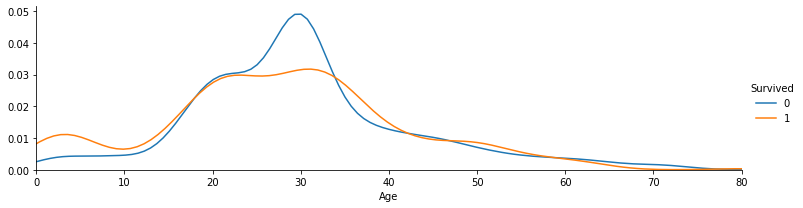

In [18]:
#Plotting survival/death rate of people with various ages
agegraph=sns.FacetGrid(train,hue='Survived',aspect=3.5)
maxage=train['Age'].max()
agegraph.set(xlim=(0,maxage))
agegraph.map(sns.kdeplot,'Age')
agegraph.add_legend()
plt.show()
#The following graph shows that:
#People aged under 17 were more likely to survive.
#People aged between 23-37 were more likely to die.
#People aged between 37-42 were more likely to survive.
#People aged between 48-58 were more likely to survive.
#People aged above 60 were more likely to die.

In [19]:
#Clubbing age groups to categories
combo=[train,test]
for dataset in combo:
    dataset.loc[dataset['Age']<=17,'Age']=1
    dataset.loc[(dataset['Age']>=18)&(dataset['Age']<=28),'Age']=2
    dataset.loc[(dataset['Age']>=29)&(dataset['Age']<=37),'Age']=3
    dataset.loc[(dataset['Age']>=38)&(dataset['Age']<=47),'Age']=4
    dataset.loc[(dataset['Age']>=48)&(dataset['Age']<=60),'Age']=5
    dataset.loc[dataset['Age']>60,'Age']=6

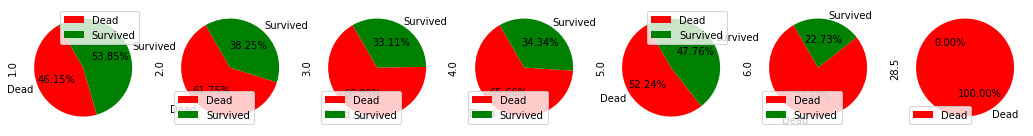

In [20]:
piechart('Age',120)
#The following pie chart shows that people belonging to age 1 category tended to survive more than others.

In [21]:
#Filling missing fare value.Only one value is missing.
pclass=test.loc[test['Fare'].isnull(),'Pclass'] #Finding Class of missing fare person
clubpclass=train.groupby("Pclass").median() #Finding mean Fare of each class
test['Fare'].fillna(clubpclass['Fare'][pclass.iloc[0]],inplace=True)

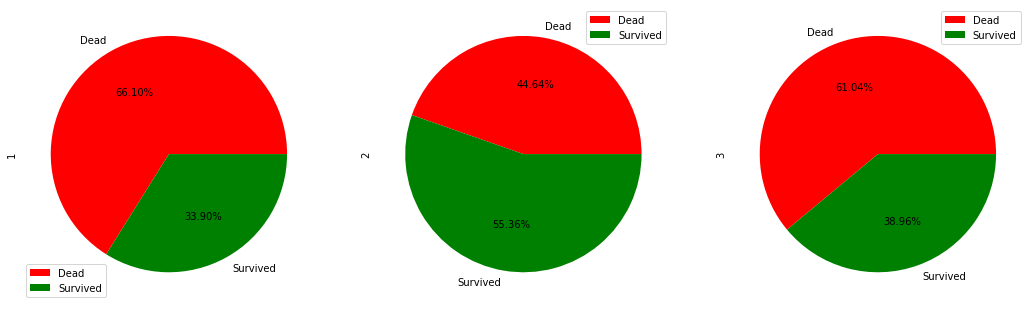

In [22]:
piechart('Embarked')
#The following pie chart shows that people who embarked from Cherbourg tended to survive than from Southampton and Queenstown.

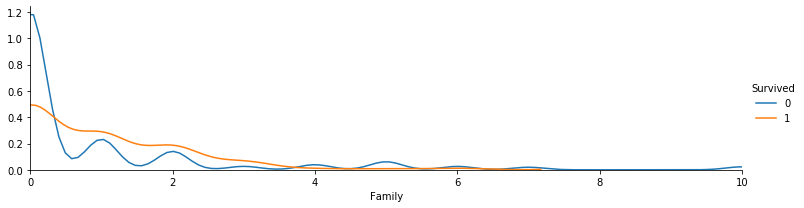

In [23]:
combo=[train,test] #combining both datasets
for dataset in combo:
    dataset['Family']=dataset['Parch']+dataset['SibSp']  #combining total no. of people belonging to the family
familygraph=sns.FacetGrid(train,hue='Survived',aspect=3.5)
maxfamilymembers=train['Family'].max()
familygraph.set(xlim=(0,maxfamilymembers))
familygraph.map(sns.kdeplot,'Family')
familygraph.add_legend()
#The following graph shows that:
#Bachelors and people with 4 or more family members were likely to die.
#People with 1-3 family members were more likely to survive.

In [24]:
#Dropping PassengerId,Name,Ticket,Cabin,SibSp,Parch column as it of not much use.
train=train.drop(['PassengerId','Name','Ticket','SibSp','Parch','Cabin'],axis=1)
test=test.drop(['PassengerId','Name','Ticket','SibSp','Parch','Cabin'],axis=1)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Prefix,Family
0,0,3,0,2.0,7.2500,1,1,1
1,1,1,1,4.0,71.2833,2,2,1
2,1,3,1,2.0,7.9250,1,4,0
3,1,1,1,3.0,53.1000,1,2,1
4,0,3,0,3.0,8.0500,1,1,0


In [25]:
#Modelling Technique to predict the survival of test dataset.
#Modelling Technique used here is Decision Tree.
#This model uses a decison tree as a predictive model which maps features (tree branches) 
#to conclusions about the target value (tree leaves). Tree models where the target variable 
#can take a finite set of values are called classification trees. In these tree structures, 
#leaves represent class labels and branches represent conjunctions of features that lead to those class labels.
X=train[['Pclass','Sex','Age','Fare','Embarked','Prefix','Family']].values
Y=train["Survived"].values
X1=test[['Pclass','Sex','Age','Fare','Embarked','Prefix','Family']].values
dectree=tree.DecisionTreeClassifier()
dectree.fit(X,Y)
Y1=dectree.predict(X1)
test['Survived']=Y1
test.head(20)
#The following DataFrame predicting the survival of test set is displayed.


,Pclass,Sex,Age,Fare,Embarked,Prefix,Family,Survived
0,3,0,3.0,7.8292,3,1,0,0
1,3,1,4.0,7.0000,1,2,1,1
2,2,0,6.0,9.6875,3,1,0,0
3,3,0,2.0,8.6625,1,1,0,0
4,3,1,2.0,12.2875,1,2,2,1
5,3,0,1.0,9.2250,1,1,0,0
6,3,1,3.0,7.6292,3,4,0,0
7,2,0,2.0,29.0000,1,1,2,0
8,3,1,2.0,7.2292,2,2,0,1
9,3,0,2.0,24.1500,1,1,2,0


In [26]:
#Accuracy of the predicted model.
accuracy=np.round(dectree.score(X,Y)*100,1)
print("Accuracy:"+str(accuracy)+'%')

Accuracy:94.6%
